# Exploration of the latent space

In [5]:
import warnings
warnings.filterwarnings("ignore") # i hate warnings

from cheff import CheffAEModel
import matplotlib.pyplot as plt
import torch
from torchvision.transforms.functional import to_pil_image, to_tensor
import PIL
import numpy as np
from matplotlib.animation import FuncAnimation

In [6]:
device = 'cpu'
sdm_path = '../assets/models/cheff_diff_uncond.pt'
ae_path = '../assets/models/cheff_autoencoder.pt'

cheff_ae = CheffAEModel(model_path=ae_path, device=device)

### exploring simple perturbations

latent space shape: torch.Size([1, 3, 64, 64])


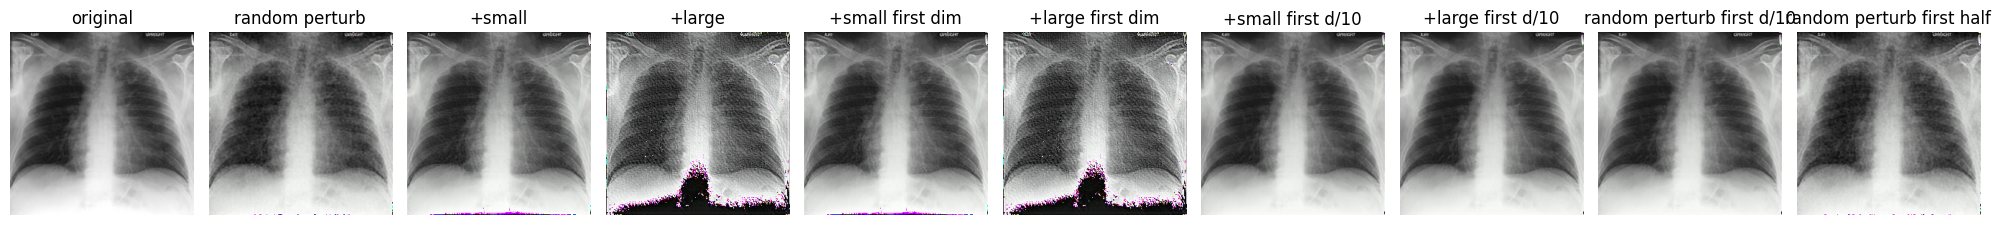

In [30]:
# mind the shitty code lol

# read and encode sample xray
img_path = '../assets/cxrs/sample1.png'
img = PIL.Image.open(img_path).convert('RGB')
img = to_tensor(img).unsqueeze(0).to(device)
z = cheff_ae.encode(img)
print('latent space shape: ' + str(z.shape))

#!-- create perturbations of the latent space

# slight random perturb to every point
z1 = z + torch.randn_like(z) * 1

# add a small amount to every point
z2 = z + 1

# add a large amount to every point
z3 = z + 5

# add a small amount to the first dimension
z4 = z.clone()
z4[0] += 1

# add a large amount to the first dimension
z5 = z.clone()
z5[0] += 5

# add a small amount to the first d/10 dimensions
z6 = z.clone()
z6[0:z6.shape[1]//10] += 1

# add a large amount to the first d/10 dimensions
z7 = z.clone()
z7[0:z7.shape[1]//10] += 5

# randomly perturb the first d/10 dimensions
z8 = z.clone()
z8[0:z8.shape[1]//10] += torch.randn_like(z8[0:z8.shape[1]//10]) * 1

# randomly perturb the first half of the dimensions
z9 = z.clone()
z9[0:z9.shape[1]//2] += torch.randn_like(z9[0:z9.shape[1]//2]) * 1

# reconstruct the latent spaces
a1 = cheff_ae.decode(z1)
a2 = cheff_ae.decode(z2)
a3 = cheff_ae.decode(z3)
a4 = cheff_ae.decode(z4)
a5 = cheff_ae.decode(z5)
a6 = cheff_ae.decode(z6)
a7 = cheff_ae.decode(z7)
a8 = cheff_ae.decode(z8)
a9 = cheff_ae.decode(z9)

# plot the results
fig, ax = plt.subplots(1, 10, figsize=(20, 5))
ax[0].imshow(to_pil_image(img[0]))
ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(to_pil_image(a1[0]))
ax[1].set_title('random perturb')
ax[1].axis('off')
ax[2].imshow(to_pil_image(a2[0]))
ax[2].set_title('+small')
ax[2].axis('off')
ax[3].imshow(to_pil_image(a3[0]))
ax[3].set_title('+large')
ax[3].axis('off')
ax[4].imshow(to_pil_image(a4[0]))
ax[4].set_title('+small first dim')
ax[4].axis('off')
ax[5].imshow(to_pil_image(a5[0]))
ax[5].set_title('+large first dim')
ax[5].axis('off')
ax[6].imshow(to_pil_image(a6[0]))
ax[6].set_title('+small first d/10')
ax[6].axis('off')
ax[7].imshow(to_pil_image(a7[0]))
ax[7].set_title('+large first d/10')
ax[7].axis('off')
ax[8].imshow(to_pil_image(a8[0]))
ax[8].set_title('random perturb first d/10')
ax[8].axis('off')
ax[9].imshow(to_pil_image(a9[0]))
ax[9].set_title('random perturb first half')
ax[9].axis('off')
plt.tight_layout()
plt.savefig('../assets/misc/output.png')


### combination latent space

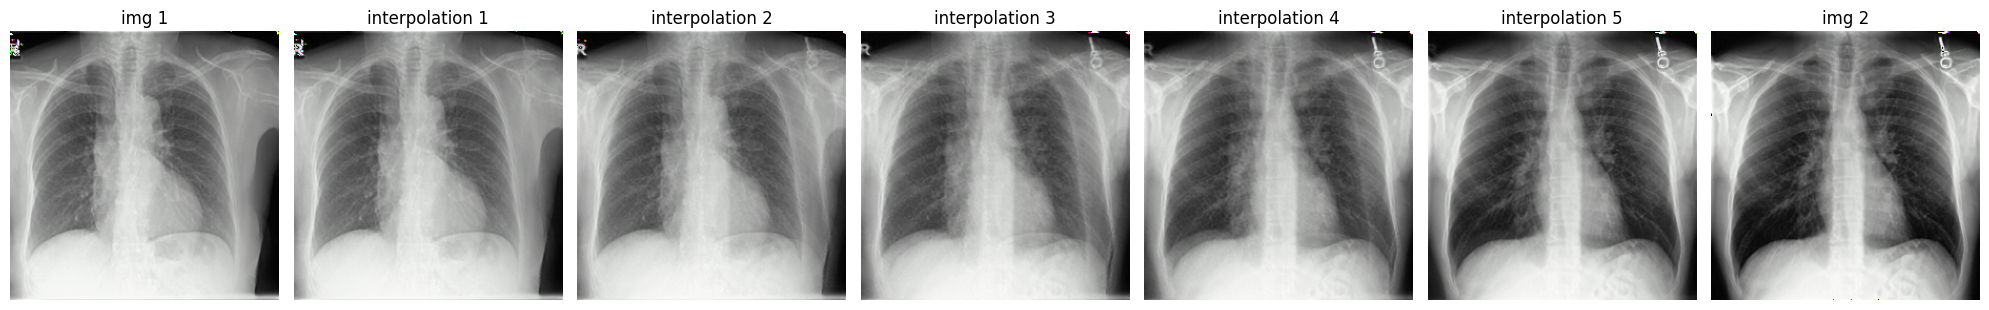

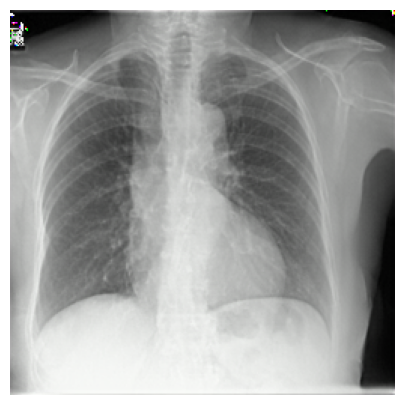

In [8]:
# generate two latent sapces from images
img_path1 = '../assets/cxrs/sample1.png'
img_path2 = '../assets/cxrs/sample2.png'
img1 = PIL.Image.open(img_path1).convert('RGB')
img2 = PIL.Image.open(img_path2).convert('RGB') 
img1 = to_tensor(img1).unsqueeze(0).to(device)
img2 = to_tensor(img2).unsqueeze(0).to(device)
z1 = cheff_ae.encode(img1)
z2 = cheff_ae.encode(img2)

# find four interpolations between the two latent spaces
z3 = z1 + 0.1 * (z2 - z1)
z4 = z1 + 0.3 * (z2 - z1)
z5 = z1 + 0.5 * (z2 - z1)
z6 = z1 + 0.7 * (z2 - z1)
z7 = z1 + 0.9 * (z2 - z1)

# decode the latent spaces
a1 = cheff_ae.decode(z1)
a2 = cheff_ae.decode(z2)
a3 = cheff_ae.decode(z3)
a4 = cheff_ae.decode(z4)
a5 = cheff_ae.decode(z5)
a6 = cheff_ae.decode(z6)
a7 = cheff_ae.decode(z7)

# plot the results
fig, ax = plt.subplots(1, 7, figsize=(20, 5))
ax[0].imshow(to_pil_image(a1[0]))
ax[0].set_title('img 1')
ax[0].axis('off')
ax[1].imshow(to_pil_image(a3[0]))
ax[1].set_title('interpolation 1')
ax[1].axis('off')
ax[2].imshow(to_pil_image(a4[0]))
ax[2].set_title('interpolation 2')
ax[2].axis('off')
ax[3].imshow(to_pil_image(a5[0]))
ax[3].set_title('interpolation 3')
ax[3].axis('off')
ax[4].imshow(to_pil_image(a6[0]))
ax[4].set_title('interpolation 4')
ax[4].axis('off')
ax[5].imshow(to_pil_image(a7[0]))
ax[5].set_title('interpolation 5')
ax[5].axis('off')
ax[6].imshow(to_pil_image(a2[0]))
ax[6].set_title('img 2')
ax[6].axis('off')
plt.tight_layout()
plt.savefig('../assets/misc/interp.png')

# generate an animation of the interpolations
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis('off')
imgs = [to_pil_image(a1[0]), to_pil_image(a3[0]), to_pil_image(a4[0]), to_pil_image(a5[0]), to_pil_image(a6[0]), to_pil_image(a7[0]), to_pil_image(a2[0])]
im = ax.imshow(imgs[0])
def update(i):
    im.set_data(imgs[i])
    return im
ani = FuncAnimation(fig, update, frames=np.arange(0, len(imgs)), interval=500)
ani.save('../assets/misc/interp.gif', writer='pillow')

# save all interpolated images for later use
for i, img in enumerate(imgs):
    img.save(f'../assets/cxrs/interp/interp_{i}.png')